In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/91976/Downloads/covid_19_data.csv")

In [3]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [4]:
# what is confirmed cases of covid world wide
df['Confirmed'].sum()

26252051758.0

In [5]:
# how many deaths have been reported globally
df['Deaths'].sum()

624013017.0

In [6]:
# how many Recovered have been reported globally
df['Recovered'].sum()

15450237912.0

In [7]:
# how many unique countries or region are present in database
len(df['Country/Region'].unique())

229

C:\Users\91976\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91976\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ObservationDate_head', ylabel='Confirmed'>

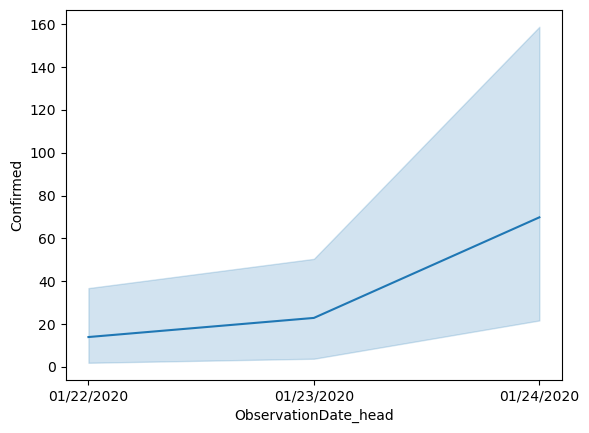

In [8]:
# what is trend of confirmed cases inovertime globally

import seaborn as sns
import matplotlib.pyplot as plt
df['ObservationDate_head']=df['ObservationDate'].iloc[:100]
sns.lineplot(data=df,x='ObservationDate_head',y='Confirmed')

In [10]:
# which province has faced as highest number of confirmed cases.

df.groupby(by='Province/State')['Confirmed'].sum().sort_values(ascending=False).head(1)

Province/State
California    696898013.0
Name: Confirmed, dtype: float64

In [11]:
# which Country region has faced as highest number of Death cases.

df.groupby(by='Country/Region')['Deaths'].sum().sort_values(ascending=False).head(1)

Country/Region
US    123303762.0
Name: Deaths, dtype: float64

<Axes: xlabel='Province/State_head', ylabel='Confirmed'>

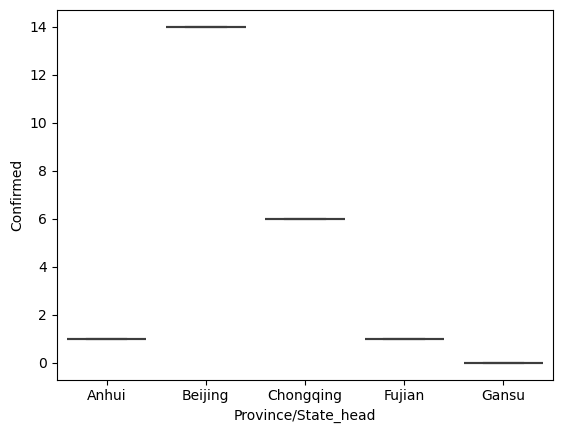

In [16]:
# how does number of confirmed cases vary accross different Province/State

df['Province/State_head']=df['Province/State'].iloc[:5]
sns.boxplot(data=df,x='Province/State_head',y='Confirmed')

C:\Users\91976\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91976\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Last Update_head', ylabel='Deaths'>

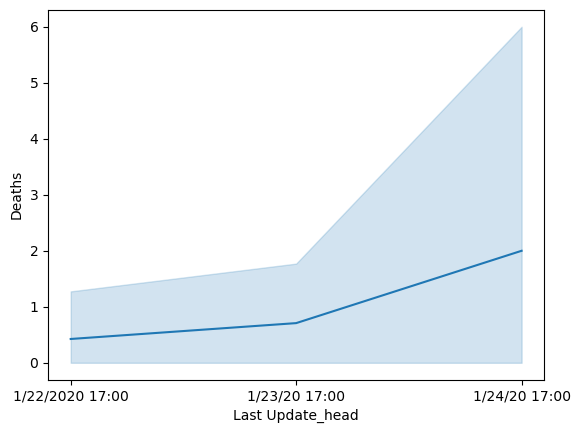

In [23]:
# what is trend of death overtime globally

df['Last Update_head']=df['Last Update'].iloc[:100]
sns.lineplot(data=df,x='Last Update_head',y='Deaths')

In [24]:
# which country/region has highest number of recovered cases.

df.groupby(by='Country/Region')['Recovered'].sum().sort_values(ascending=False).head(1)

Country/Region
India    2.900590e+09
Name: Recovered, dtype: float64

<Axes: xlabel='Country/Region_head', ylabel='Recovered'>

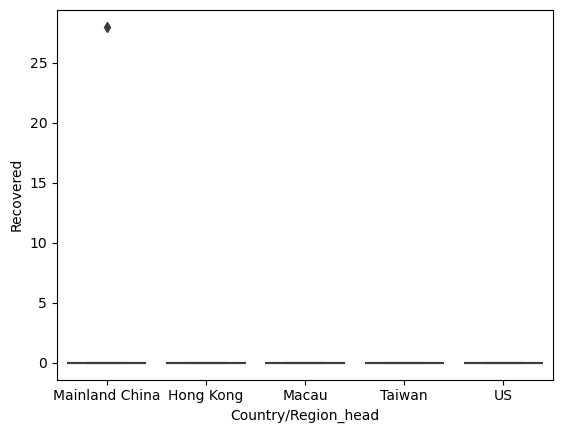

In [30]:
# how does number of recovered cases vary accross different country or region.

df['Country/Region_head']=df['Country/Region'].iloc[:35]
sns.boxplot(data=df,x='Country/Region_head',y='Recovered')

<Axes: xlabel='Country/Region_head', ylabel='Confirmed'>

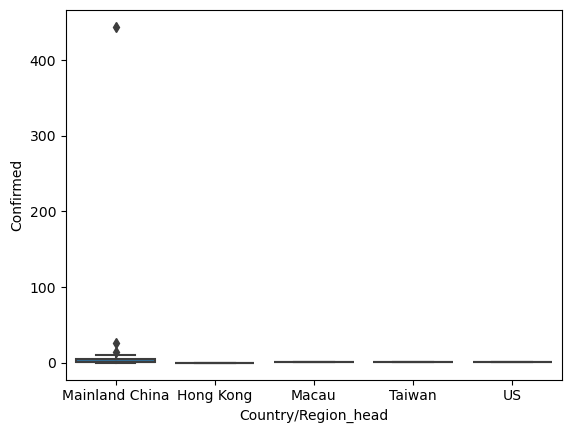

In [31]:
# what is distribution of confirmed cases by country or region.

df['Country/Region_head']=df['Country/Region'].iloc[:35]
sns.boxplot(data=df,x='Country/Region_head',y='Confirmed')

In [32]:
# is there a co-relation between confirmed cases and death.

df[['Confirmed','Deaths']].corr()

,Confirmed,Deaths
Confirmed,1.000000,0.888416
Deaths,0.888416,1.000000


In [33]:
# is there a co-relation between confirmed cases and recovered.

df[['Confirmed','Recovered']].corr()

,Confirmed,Recovered
Confirmed,1.000000,0.633479
Recovered,0.633479,1.000000


<Axes: xlabel='Country/Region_head', ylabel='Mortality rate'>

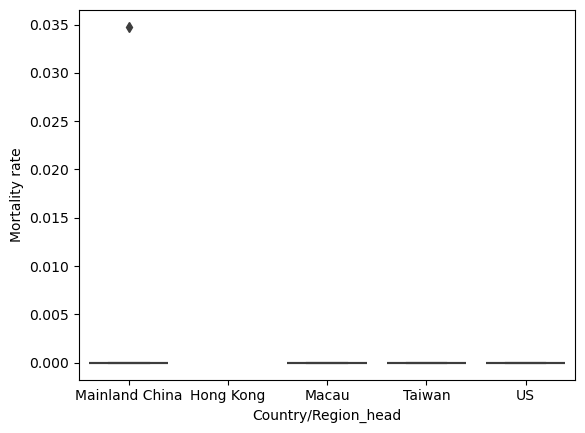

In [36]:
# how does a motrtality rate vary accross different countries/regions

df['Total']=df['Deaths']+df['Confirmed']+df['Recovered']
df['Mortality rate']=df['Deaths']/df['Total']
df['Country/Region_head']=df['Country/Region'].iloc[:35]
sns.boxplot(data=df,x='Country/Region_head',y='Mortality rate')

<Axes: xlabel='Country/Region_head', ylabel='Recovered rate'>

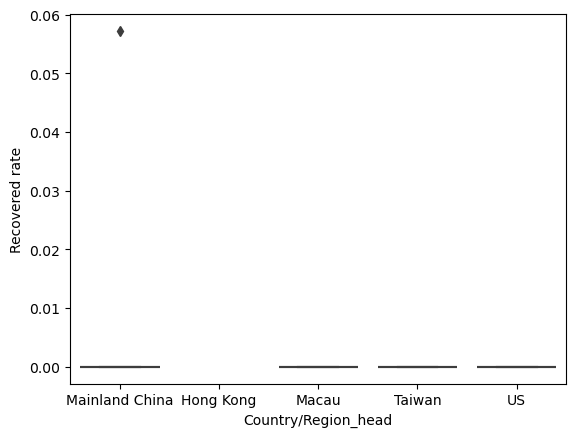

In [38]:
# how does a recovery rate vary accross different countries/regions

df['Total']=df['Recovered']+df['Confirmed']+df['Deaths']
df['Recovered rate']=df['Recovered']/df['Total']
df['Country/Region_head']=df['Country/Region'].iloc[:35]
sns.boxplot(data=df,x='Country/Region_head',y='Recovered rate')

C:\Users\91976\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91976\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ObservationDate_head', ylabel='Confirmed'>

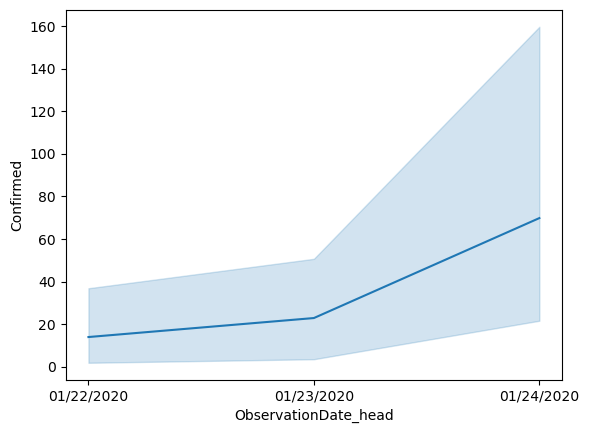

In [40]:
# what is trend of new confirm cases overtime.

df['ObservationDate_head']=df['ObservationDate'].iloc[:100]
sns.lineplot(data=df,x='ObservationDate_head',y='Confirmed')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SNo                   306429 non-null  int64  
 1   ObservationDate       306429 non-null  object 
 2   Province/State        228326 non-null  object 
 3   Country/Region        306429 non-null  object 
 4   Last Update           306429 non-null  object 
 5   Confirmed             306429 non-null  float64
 6   Deaths                306429 non-null  float64
 7   Recovered             306429 non-null  float64
 8   ObservationDate_head  100 non-null     object 
 9   Province/State_head   5 non-null       object 
 10  Last Update_head      100 non-null     object 
 11  Country/Region_head   35 non-null      object 
 12  Total                 306429 non-null  float64
 13  Mortality rate        303103 non-null  float64
 14  Recovered rate        303103 non-null  float64
dtype

<Axes: xlabel='Province/State_head', ylabel='Mortality rate'>

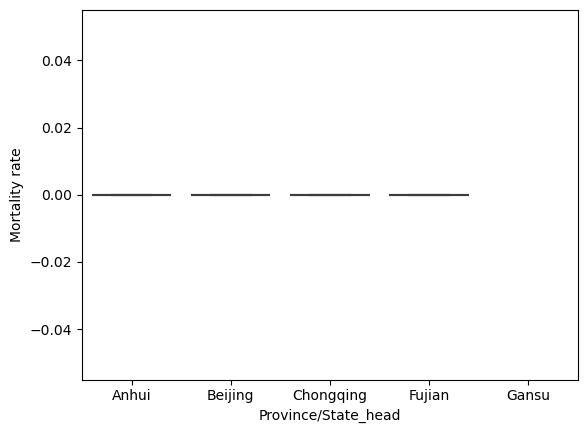

In [49]:
# how does mortality vary accross different province/state


df['Province/State_head']=df['Province/State'].iloc[:5]
sns.boxplot(data=df,x='Province/State_head',y='Mortality rate')

<Axes: xlabel='Province/State_head', ylabel='Recovered rate'>

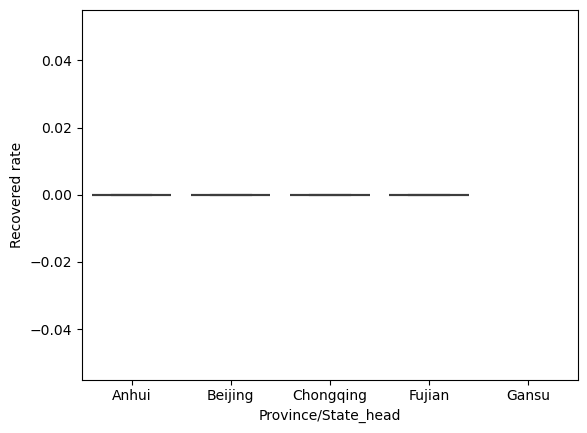

In [51]:
# how does Recovered vary accross different province/state


df['Province/State_head']=df['Province/State'].iloc[:5]
sns.boxplot(data=df,x='Province/State_head',y='Recovered rate')

C:\Users\91976\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91976\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Last Update_head', ylabel='Active cases'>

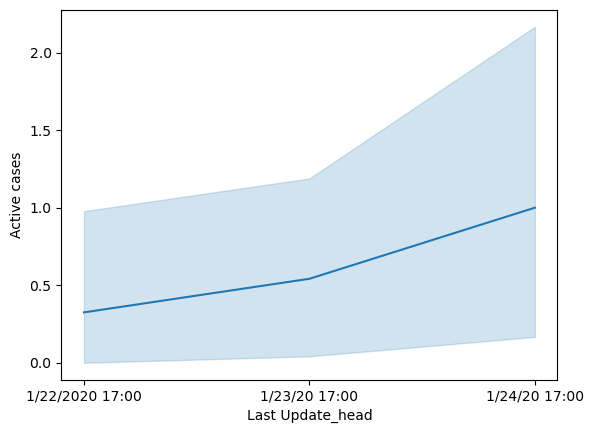

In [54]:
# what is trend of active cases overtime.

df['Active cases']=df['Recovered']-df['Deaths']
df['Last Update_head']=df['Last Update'].iloc[:100]
sns.lineplot(data=df,x='Last Update_head',y='Active cases')
